## Mô tả bộ dữ liệu
- **sex**: 1 cho nữ và 2 cho nam.
- **age**: Tuổi của bệnh nhân.
- **classification**: Kết quả xét nghiệm COVID. Giá trị từ 1-3 nghĩa là bệnh nhân được chẩn đoán mắc COVID ở các mức độ khác nhau. 4 hoặc cao hơn nghĩa là bệnh nhân không mắc COVID hoặc kết quả xét nghiệm không xác định.
- **patient type**: Loại chăm sóc mà bệnh nhân nhận được tại đơn vị. 1 là về nhà và 2 là nhập viện.
- **pneumonia**: Bệnh nhân có viêm các túi khí hay không.
- **pregnancy**: Bệnh nhân có đang mang thai hay không.
- **diabetes**: Bệnh nhân có bệnh tiểu đường hay không.
- **copd**: Bệnh nhân có bị bệnh phổi tắc nghẽn mạn tính hay không.
- **asthma**: Bệnh nhân có bị hen suyễn hay không.
- **inmsupr**: Bệnh nhân có bị suy giảm miễn dịch hay không.
- **hypertension**: Bệnh nhân có bị tăng huyết áp hay không.
- **cardiovascular**: Bệnh nhân có bệnh tim hoặc các bệnh liên quan đến mạch máu hay không.
- **renal chronic**: Bệnh nhân có bệnh thận mạn tính hay không.
- **other disease**: Bệnh nhân có bệnh khác hay không.
- **obesity**: Bệnh nhân có bị béo phì hay không.
- **tobacco**: Bệnh nhân có sử dụng thuốc lá hay không.
- **usmr**: Bệnh nhân có được điều trị tại các đơn vị y tế cấp cứu cấp 1, 2 hoặc 3 hay không.
- **medical unit**: Loại cơ sở thuộc Hệ thống Y tế Quốc gia đã cung cấp chăm sóc.
- **intubed**: Bệnh nhân có được kết nối với máy thở hay không.
- **icu**: Bệnh nhân có được nhập vào Đơn vị Chăm sóc Đặc biệt hay không.
- **date died**: Nếu bệnh nhân tử vong, ghi ngày tử vong; nếu không sẽ nhận giá trị 9999-99-99.

## Khám phá dữ liệu

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv('Covid Data.csv')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

## Tiền xử lý dữ liệu

In [61]:
data = data.dropna()
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [62]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [63]:
df = data.copy()

In [64]:
df['DATE_DIED'].value_counts()


DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [65]:
df.DATE_DIED[df['DATE_DIED'] != '9999-99-99'] = 1
df.DATE_DIED[df['DATE_DIED'] == '9999-99-99'] = 0
df.DATE_DIED.value_counts()

DATE_DIED
0    971633
1     76942
Name: count, dtype: int64

<Axes: title={'center': 'Count (DATE_DIED)'}, xlabel='DATE_DIED'>

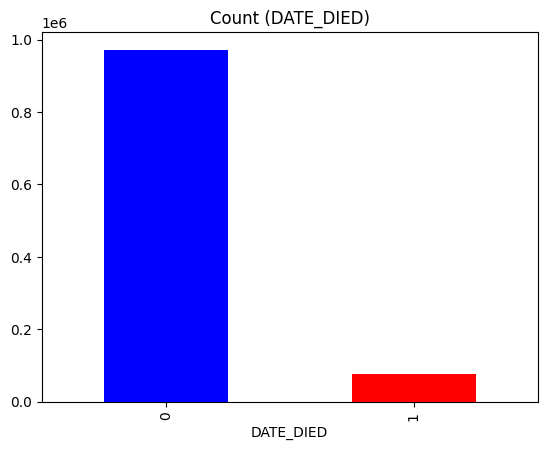

In [66]:
df['DATE_DIED'].value_counts().plot(kind='bar', title='Count (DATE_DIED)', color=['b', 'r'])

Thay feature 'DATE_DIED' bằng feature 'DEATH'

In [67]:
df['DEATH'] = df.DATE_DIED

In [68]:
df.drop(columns=['DATE_DIED'], inplace=True)

In [69]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

In [70]:
df['SEX'].value_counts()

SEX
1    525064
2    523511
Name: count, dtype: int64

In [71]:
df['SEX'].replace({1:'Female', 2:'Male'}, inplace=True)

In [72]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].value_counts()  

SEX     PREGNANT
Female  1             8131
        2           513179
        98            3754
Male    97          523511
Name: count, dtype: int64

In [73]:
df.PREGNANT.replace({97:0, 98:np.nan}, inplace = True)

In [74]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].value_counts()  

SEX     PREGNANT
Female  1.0           8131
        2.0         513179
Male    0.0         523511
Name: count, dtype: int64

In [75]:
df['PREGNANT'].isnull().sum()

3754

In [76]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

Thay đổi 2 về 0. 1 là có, 0 là không có 

In [77]:
df['USMER'].replace(2.0, 0, inplace=True)
df['SEX'].replace(2.0, 0, inplace=True)
df['PATIENT_TYPE'].replace(2.0, 0, inplace=True)
df['INTUBED'].replace(2.0, 0, inplace=True)
df['PNEUMONIA'].replace(2.0, 0, inplace=True)
df['PREGNANT'].replace(2.0, 0, inplace=True)
df['DIABETES'].replace(2.0, 0, inplace=True)
df['COPD'].replace(2.0, 0, inplace=True)
df['ASTHMA'].replace(2.0, 0, inplace=True)
df['INMSUPR'].replace(2.0, 0, inplace=True)
df['HIPERTENSION'].replace(2.0, 0, inplace=True)
df['OTHER_DISEASE'].replace(2.0, 0, inplace=True)
df['CARDIOVASCULAR'].replace(2.0, 0, inplace=True)
df['OBESITY'].replace(2.0, 0, inplace=True)
df['RENAL_CHRONIC'].replace(2.0, 0, inplace=True)
df['TOBACCO'].replace(2.0, 0, inplace=True)
df['ICU'].replace(2.0, 0, inplace=True)

Đổi giá trị của feature PATIENT_TYPE. 1 là hospitalized, 0 là not hospitalized

In [78]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
0    200031
Name: count, dtype: int64

In [79]:
df.PATIENT_TYPE.replace({1:'hospitaliezed', 0:'not hospitalized'}, inplace=True)

In [80]:
df['CLASIFFICATION_FINAL'].replace([1,2,3,4,5,6,7],
                                   ['patient was diagnosed with covid in different degrees.','patient was diagnosed with covid in different degrees.','patient was diagnosed with covid in different degrees.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.'],inplace=True)

In [81]:
df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
the patient is not a carrier of covid or that the test is inconclusive.    656596
patient was diagnosed with covid in different degrees.                     391979
Name: count, dtype: int64

In [82]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
hospitaliezed       848544
not hospitalized    200031
Name: count, dtype: int64

Các giá trị 97, 98, 99 chuyển thành null

In [83]:
df['TOBACCO'].value_counts()

TOBACCO
0     960979
1      84376
98      3220
Name: count, dtype: int64

In [84]:
df.replace([97,98,99], np.nan, inplace=True)

Missing value

In [85]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
DEATH                        0
dtype: int64

Loại bỏ những feature có số lượng giá trị null lớn

In [86]:
df.drop(columns=["INTUBED", "ICU"], inplace=True)

Tiếp tục loại bỏ những dữ liệu null

In [87]:
df.dropna(inplace=True)

In [88]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DEATH                   0
dtype: int64

## Encoding những dữ liệu dạng Object

In [89]:
df.describe(include=object)

,SEX,PATIENT_TYPE,CLASIFFICATION_FINAL
count,1021655,1021655,1021655
unique,2,2,2
top,Male,hospitaliezed,the patient is not a carrier of covid or that ...
freq,511795,830233,634185


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
cols = ['SEX', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021655 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1021655 non-null  int64  
 1   MEDICAL_UNIT          1021655 non-null  int64  
 2   SEX                   1021655 non-null  int32  
 3   PATIENT_TYPE          1021655 non-null  int32  
 4   PNEUMONIA             1021655 non-null  float64
 5   AGE                   1021655 non-null  float64
 6   PREGNANT              1021655 non-null  float64
 7   DIABETES              1021655 non-null  float64
 8   COPD                  1021655 non-null  float64
 9   ASTHMA                1021655 non-null  float64
 10  INMSUPR               1021655 non-null  float64
 11  HIPERTENSION          1021655 non-null  float64
 12  OTHER_DISEASE         1021655 non-null  float64
 13  CARDIOVASCULAR        1021655 non-null  float64
 14  OBESITY               1021655 non-null 

In [93]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,0,0,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0,1,1,0,1.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1
2,0,1,1,1,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,0,1,0,0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0,1,1,0,0.0,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,13,1,0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1048571,1,13,1,1,0.0,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1048572,0,13,1,0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1048573,0,13,1,0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


## Trực quan hóa dữ liệu

In [94]:
df['SEX'].value_counts()

SEX
1    511795
0    509860
Name: count, dtype: int64

In [95]:
import plotly.graph_objects as go

labels = ['Female','Male']
values = [ 511795, 509860]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Text(0.5, 1.0, 'AGE DISTRIBUTION')

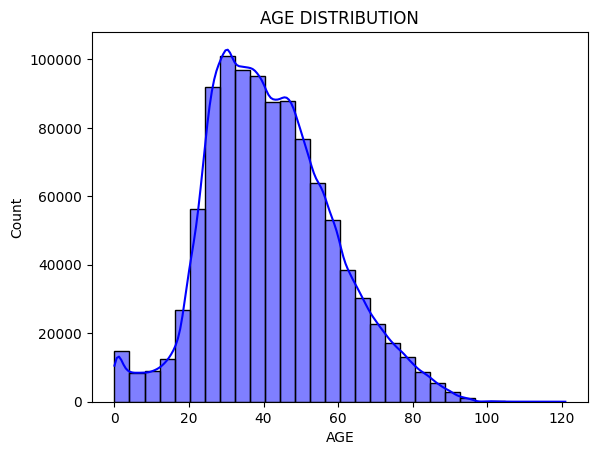

In [96]:
sns.histplot(df['AGE'], kde=True, color='b', bins=30)
plt.title('AGE DISTRIBUTION')

<Axes: xlabel='AGE', ylabel='Count'>

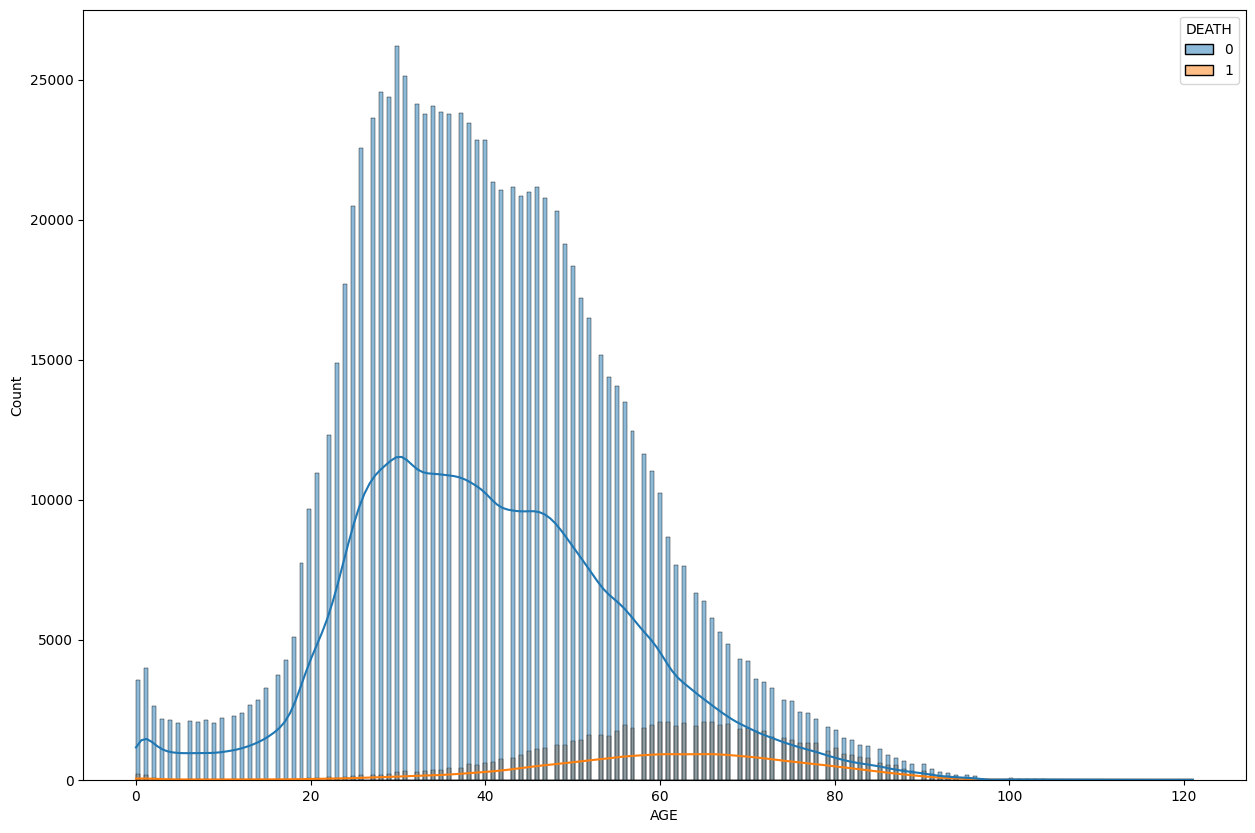

In [97]:
plt.figure(figsize = (15, 10))
sns.histplot(x = 'AGE', hue = 'DEATH', data = df , kde=True )

- Người cao tuổi có khả năng tử vong cao hơn người trẻ

In [98]:
df['DIABETES'].value_counts()

DIABETES
0.0    899531
1.0    122124
Name: count, dtype: int64

<Axes: xlabel='DIABETES', ylabel='count'>

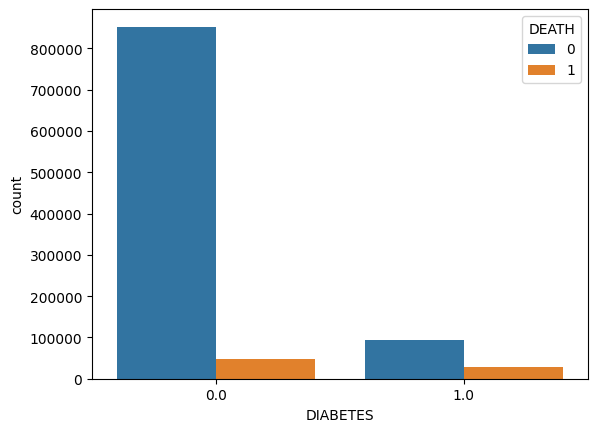

In [99]:
sns.countplot(data = df, x = "DIABETES", hue = "DEATH")

<Axes: xlabel='HIPERTENSION', ylabel='count'>

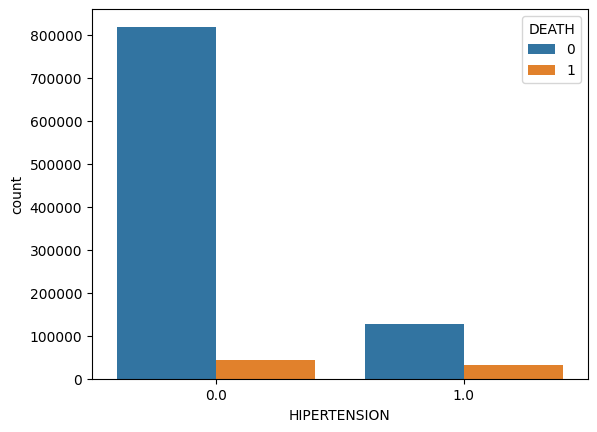

In [100]:
sns.countplot(data=df, x="HIPERTENSION", hue="DEATH")

- Số người nhiễm virus Corona mắc bệnh tăng huyết áp có khả năng tử vong cao hơn so với những người không mắc bệnh tăng huyết áp.

<Axes: xlabel='RENAL_CHRONIC', ylabel='count'>

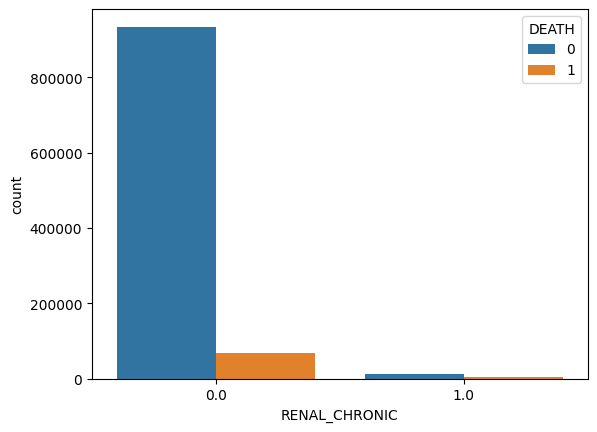

In [101]:
sns.countplot(data=df, x="RENAL_CHRONIC", hue="DEATH")

## Make data ready for modeling

In [102]:
df['COPD'].value_counts()

COPD
0.0    1007356
1.0      14299
Name: count, dtype: int64

- Dữ liệu đang bị mất cân bằng

In [103]:
x=df.drop('DEATH',axis=1).values
y=df['DEATH'].values

- Under sample

In [104]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler().fit_resample(x,y)
print(X_under.shape, y_under.shape)

(149110, 18) (149110,)


## Train test split

In [105]:
x_train , x_test , y_train , y_test = train_test_split(X_under, y_under , test_size=0.2, random_state=42)

## Modeling

## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [108]:
lr.score(x_train, y_train)

0.9054892361343975

In [109]:
lr.score(x_test, y_test)

0.9033599356180001